In [2]:
import warnings
warnings.filterwarnings('ignore')

### Cracking US New & World Reports College Rankings

<img src="../images/life is linear.png" style="width: 1000px;"/>

In [1]:
import numpy as np
from scipy import linalg

collegedata=np.genfromtxt('collegedata.csv',delimiter=',', dtype=None)

college=[]

#create matrices of correct size
A=np.zeros((len(collegedata),14))
B=np.zeros(len(collegedata))


for i in range(len(collegedata)):
    college.append(collegedata[i][0]) #list of colleges is the first column
    B[i]=collegedata[i][1] # list of rankings is the second column

#populate the rest of the college data in matrix A
for j in range(14):
    for i in range(len(collegedata)):
        A[i][j]=collegedata[i][j+2]

#use linear least squares to find weights of each variable        
X=linalg.inv(A.T.dot(A)).dot(A.T).dot(B)

#to find projected ranking for Colby(#17)
school=[]
for i in range(2,16):
    school.append(collegedata[17][i]) #school to check rating for

print('weights for each variable', X)
print(college[17], 'info', school)
print(college[17], 'predicted ranking:', X.dot(school))
print('two most positive attributes: academic reputation and freshmen retention')
print('two most negative attributes: financial resources rank and student/fac ratio (the higher the students per faculty the lower the ranking')

weights for each variable [ 0.4440285   0.0458188  -0.00221458  0.08345614 -0.02947973 -0.08629494
  0.02441425  0.01411534  0.06145716 -0.02275785 -0.06828671  0.47483306
 -0.10011752  0.15681036]
b'colby' info [81, 25, 1335, 61, 29, 20, 69, 2.0, 10, 93, 14, 95, 29, 41]
b'colby' predicted ranking: 84.55517212870674
two most positive attributes: academic reputation and freshmen retention
two most negative attributes: financial resources rank and student/fac ratio (the higher the students per faculty the lower the ranking


/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.


### Image Compression (SVD Decomposition)

size of matrix 113 220
rank= 113


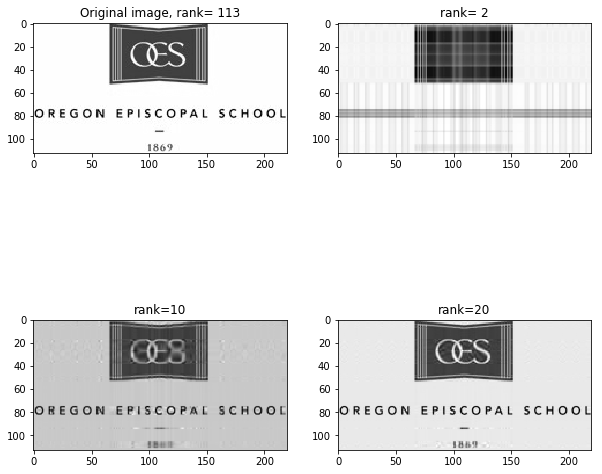

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
#convert image to grayscale so we are only dealing
#  with an mxn gray matrix instead of an mxnx3 RGB matrix
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

img = mpimg.imread('oes.png')
gray = rgb2gray(img)
print('size of matrix',len(gray),len(gray[0]))
rank=min(len(gray),len(gray[0]))
print('rank=',rank)

plt.rcParams['figure.figsize'] = 10,10
plt.figure(1)
plt.subplot(221)
plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.title('Original image, rank= %s'%rank)

#SVD to compress the image to rank1
rank1=2
LA = np.linalg
a = np.array(gray)

U, s, Vh = LA.svd(a, full_matrices=False)
assert np.allclose(a, np.dot(U, np.dot(np.diag(s), Vh)))

s[rank1:] = 0
new_a = np.dot(U, np.dot(np.diag(s), Vh))

plt.subplot(222)
plt.imshow(new_a, cmap = plt.get_cmap('gray'))
plt.title('rank= %s'%rank1)


#SVD to compress the image to rank2
rank2=10
U2, s2, Vh2 = LA.svd(a, full_matrices=False)
assert np.allclose(a, np.dot(U2, np.dot(np.diag(s2), Vh2)))

s2[rank2:] = 0
new_a2 = np.dot(U2, np.dot(np.diag(s2), Vh2))


plt.subplot(223)
plt.imshow(new_a2, cmap = plt.get_cmap('gray'))
plt.title('rank=%s'%rank2)


#SVD to compress the image to rank3
rank3=20
U3, s3, Vh3 = LA.svd(a, full_matrices=False)
assert np.allclose(a, np.dot(U3, np.dot(np.diag(s3), Vh3)))

s3[rank3:] = 0
new_a3 = np.dot(U3, np.dot(np.diag(s3), Vh3))


plt.subplot(224)
plt.imshow(new_a3, cmap = plt.get_cmap('gray'))
plt.title('rank=%s'%rank3)


### Calculating similar movies

In [10]:
#this program uses the movielens ratings data set
##and inserts a rating of 0 if a user didn't rate a movie

import numpy as np

#smaller data set:
moviedata=np.genfromtxt('smallermovieset.csv',delimiter=',',dtype=int)

#original data set:
###


movielist=moviedata[:,0]
userlist=moviedata[:,1]
ratinglist=moviedata[:,2]


moviemin=np.amin(moviedata,axis=0)[0]
moviemax=np.amax(moviedata,axis=0)[0]
usermin=np.amin(moviedata,axis=0)[1]
usermax=np.amax(moviedata,axis=0)[1]

unique=np.unique(movielist)

for i in unique:
    print(i)
    for j in range(usermin,usermax+1):
        inside=False
        for ratings in range(1,6):
            if True in np.all(moviedata==np.array((i,j,ratings)),axis=1):
                inside = True
        if inside == False:
            moviedata=np.vstack([moviedata,np.array((i,j,0))])


updatedmoviedata=np.sort(moviedata.view('i8,i8,i8'), order=['f0'], axis=0).view(np.int)
print(updatedmoviedata)
np.savetxt("updatedmoviedata.csv", updatedmoviedata, delimiter=",",fmt='%d')


50
99
168
172
174
181
182
187
404
418
501
693
[[ 50   1   5]
 [ 50   2   5]
 [ 50   3   0]
 ...
 [693 941   0]
 [693 942   0]
 [693 943   0]]


In [4]:
import numpy as np
#make keys for movie names corresponding to movie number

num_to_movie_key={}
movie_to_num_key={}
movie_indices = []

with open('movienamekey.csv', 'r') as f:
    for i, line in enumerate(f):
        num, name = int(line.split(',')[0]),  line.split(',')[1].strip()
        num_to_movie_key[num]=name
        movie_to_num_key[name] = num
        movie_indices.append(num)
        
print(num_to_movie_key)

print(movie_to_num_key)


{50: 'star_wars', 99: 'snow_white', 168: 'monty_python', 172: 'empire_strikes_back', 174: 'raiders_of_the_lost_ark', 181: 'return_of_the_jedi', 182: 'goodfellas', 187: 'godfather', 404: 'pinocchio', 418: 'cinderella', 501: 'dumbo', 693: 'casino'}
{'star_wars': 50, 'snow_white': 99, 'monty_python': 168, 'empire_strikes_back': 172, 'raiders_of_the_lost_ark': 174, 'return_of_the_jedi': 181, 'goodfellas': 182, 'godfather': 187, 'pinocchio': 404, 'cinderella': 418, 'dumbo': 501, 'casino': 693}


In [5]:
##put large movie data matrix into smaller arrays corresponding to each movie
import pandas as pd
moviedata=pd.read_csv('updatedmoviedata.csv', header = None)
moviedata = moviedata.rename(columns = {0:'movie', 1: 'user', 2: 'rating'})
movies = np.unique(moviedata['movie'])
num_of_users=int(len(moviedata)/len(movies))
movie_matrix=np.zeros((num_of_users,len(movies)))
i=0
j=0
for k in range(len(moviedata)):
    if k > 1 and k % num_of_users == 0:
        i=0
        j=j+1
    movie_matrix[i,j]=moviedata['rating'][k]
    i=i+1


In [6]:
##ask user for which movie they want to find similar movies to
n=input('What movie would you like to find similar ones to? ')

####calculate norms
normlist=[]
for j in range(movie_matrix.shape[1]):
    mysum = 0
    norm=0
    for i in range(movie_matrix.shape[0]):
        mysum=mysum+(movie_matrix[i,movie_indices.index(movie_to_num_key[n])]-movie_matrix[i,j])**2
        norm=np.sqrt(mysum)
    normlist.append((norm,j))
    
##print most similar movies
def getKey(item):
    return item[0]

sortedmovies=sorted(normlist,key=getKey)

print('movies closest to',num_to_movie_key[movie_to_num_key[n]], 'are:' )

for i in range(len(sortedmovies)):
    print(sortedmovies[i][0],num_to_movie_key[movie_indices[sortedmovies[i][1]]])



What movie would you like to find similar ones to? star_wars
movies closest to star_wars are:
0.0 star_wars
50.39841267341661 return_of_the_jedi
69.50539547402057 raiders_of_the_lost_ark
71.06335201775947 empire_strikes_back
83.01807032206904 monty_python
91.35644476444998 goodfellas
93.03762679690406 godfather
93.2148056909416 snow_white
96.46242791885346 cinderella
97.57561170702442 dumbo
98.93432164825309 pinocchio
100.7620960480676 casino
